</div> <div class="alert alert-block alert-info"> 
# Live GeoComputation Demo! Spatial Data Viz with Rubber-Sheet Algorithms (in 15mins)

</div> <div class="alert alert-block alert-danger"> 
## Scenario for this demo = Data Science Research! In which European country do people eat the most Cheese?

</div> <div class="alert alert-block alert-success"> 
## But first, quick intro to me!

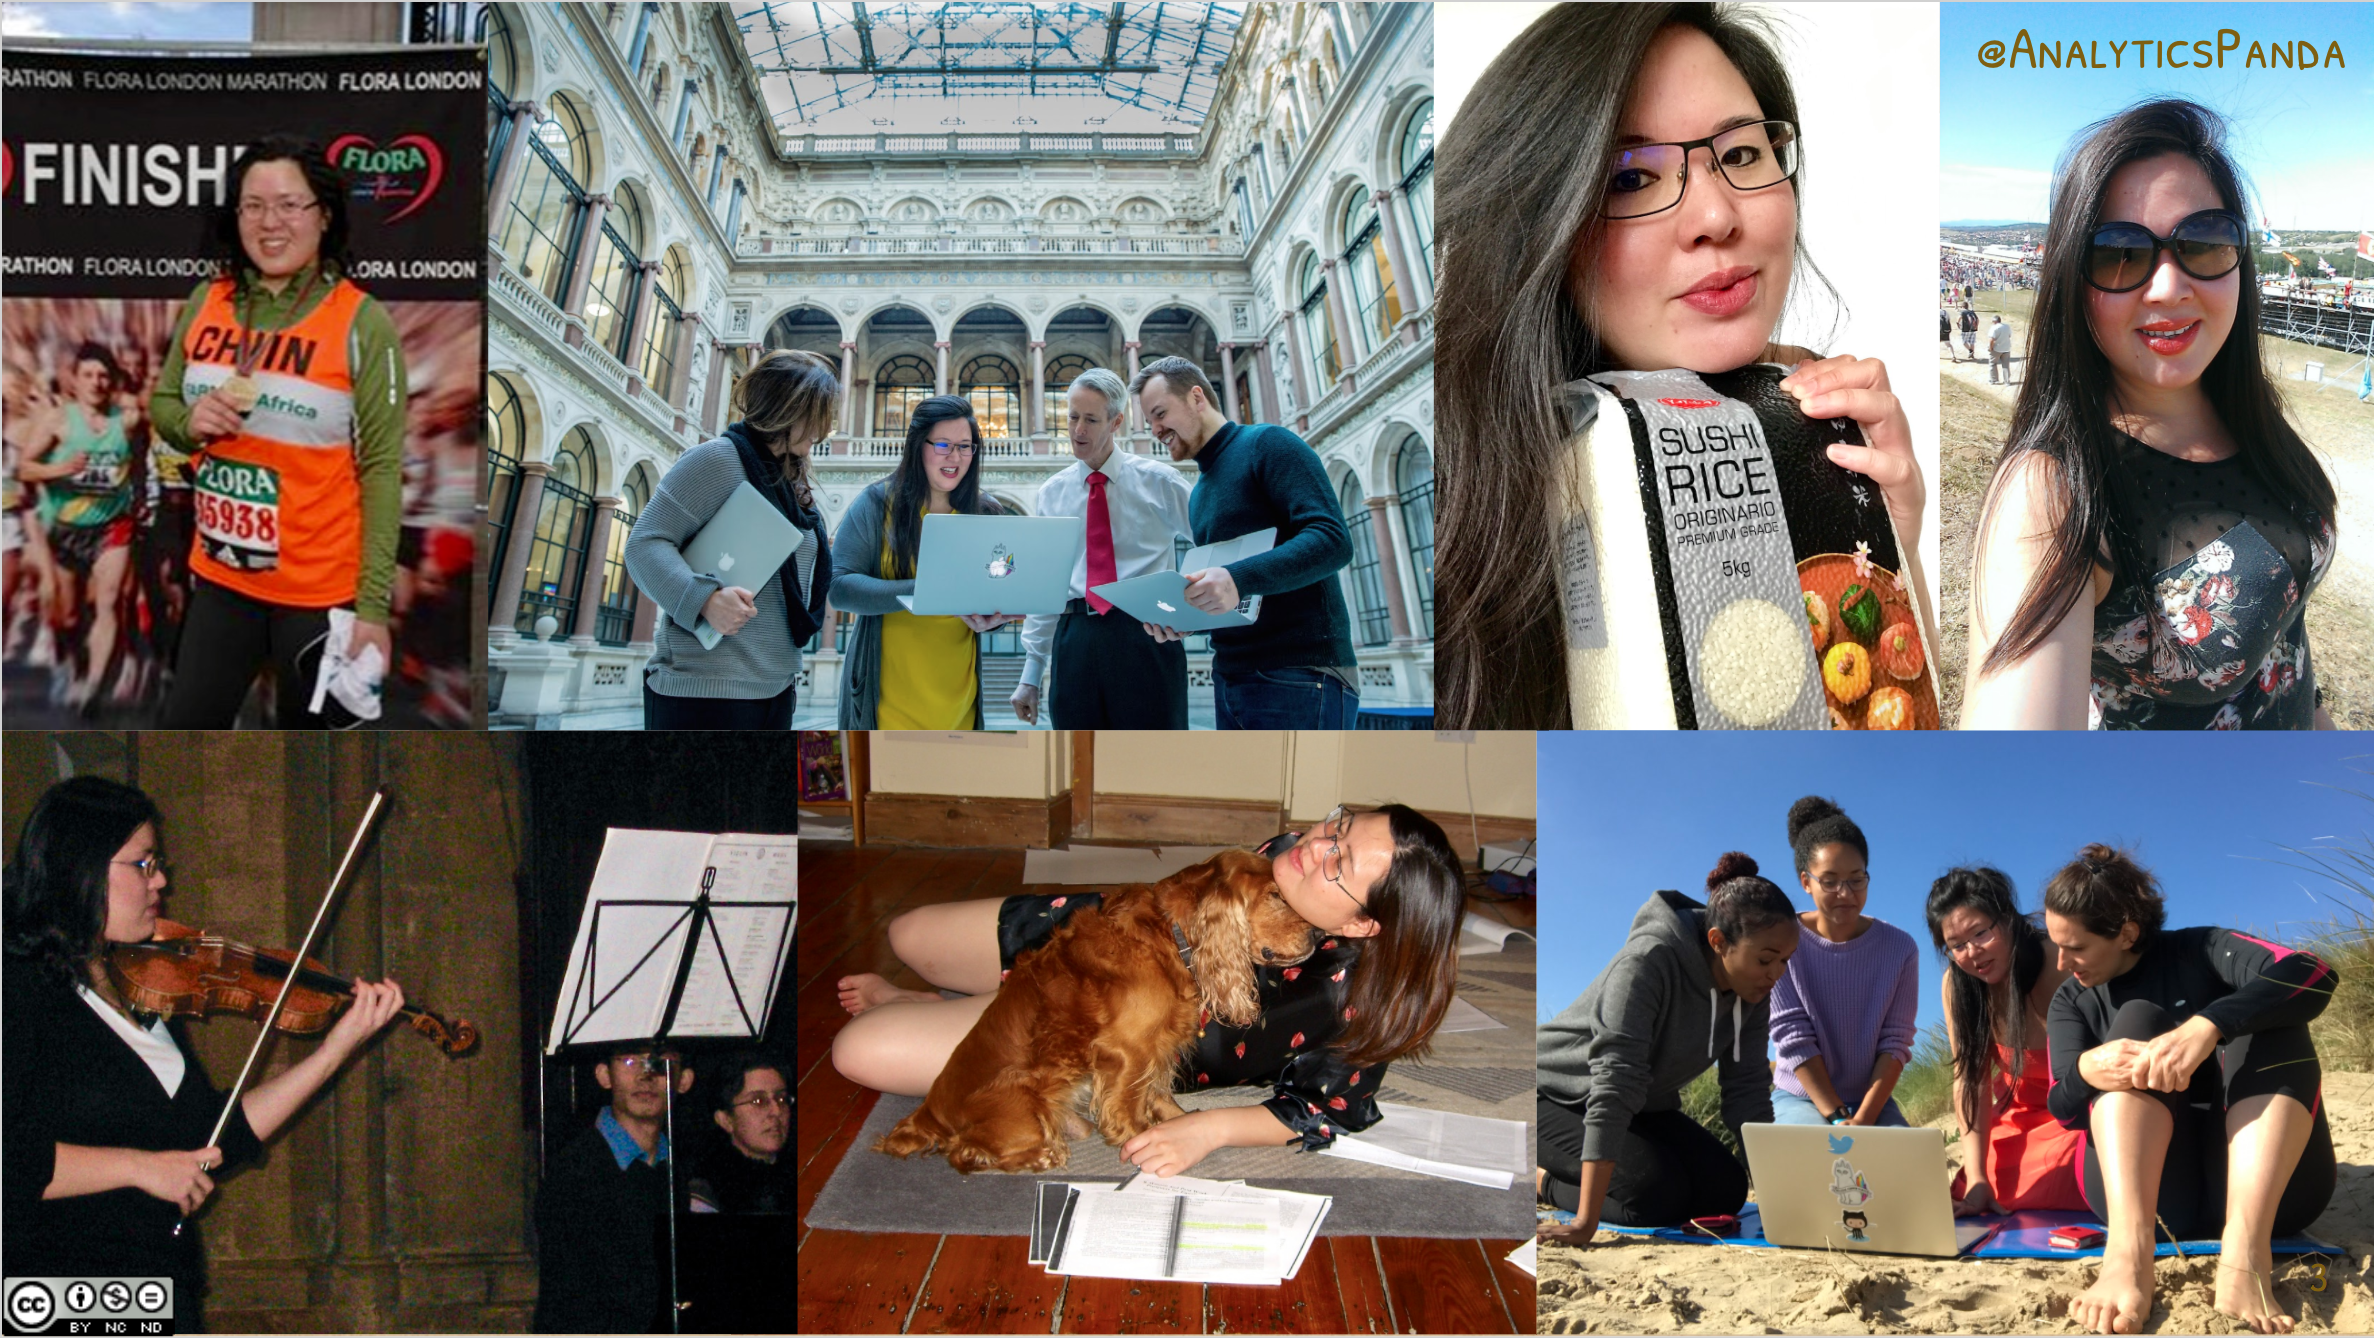

</div> <div class="alert alert-block alert-success"> 
## Sourcing data!

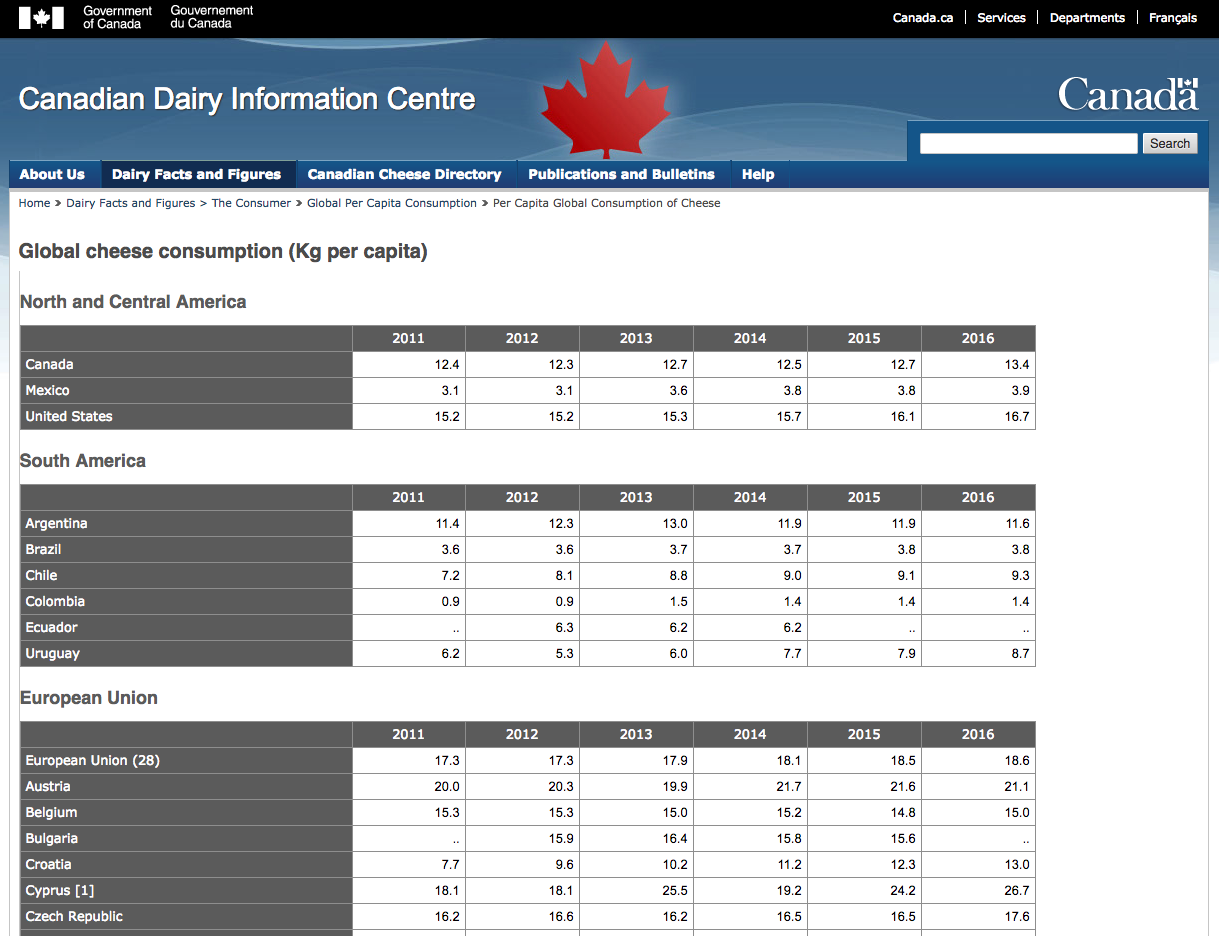

</div> <div class="alert alert-block alert-success"> 
## A Data Viz workflow for creating engaging Continguous Area Cartograms using R statistical computing language:

In [1]:
# Load the necessary R packages
library(tmap)
library(tmaptools)
library(maptools)
library(cartogram)

Loading required package: sp
Checking rgeos availability: TRUE


In [2]:
# Load spatialpolygondataframe of Europe
data(Europe)

In [3]:
# View different slots available
slotNames(Europe)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

In [4]:
# Eyeball the data slot of the Europe object
head(Europe@data, n=5)

iso_a3 name    sovereignt continent part            EU_Schengen area      
5  ALB    Albania Albania    Europe    Southern Europe NA          27400.0000
6  ALA    Aland   Finland    Europe    Northern Europe NA            674.3813
7  AND    Andorra Andorra    Europe    Southern Europe NA            470.0000
10 ARM    Armenia Armenia    Asia      NA              NA                  NA
17 AUT    Austria Austria    Europe    Western Europe  EU Schengen 82409.0000
   pop_est pop_est_dens gdp_md_est gdp_cap_est economy                   
5  3639453 132.82675     21810      5992.659   6. Developing region      
6    27153  40.26357      1563     57562.700   2. Developed region: nonG7
7    83888 178.48511      3660     43629.601   2. Developed region: nonG7
10      NA        NA        NA            NA   NA                        
17 8210281  99.62845    329500     40132.609   2. Developed region: nonG7
   income_grp              life_exp well_being HPI     
5  4. Lower middle income  76.9     5.268937   54.05118
6  1. High income: OECD      NA           NA         NA
7  2. High income: nonOECD   NA           NA         NA
10 NA                        NA           NA         NA
17 1. High income: OECD    80.9     7.346036   47.08514

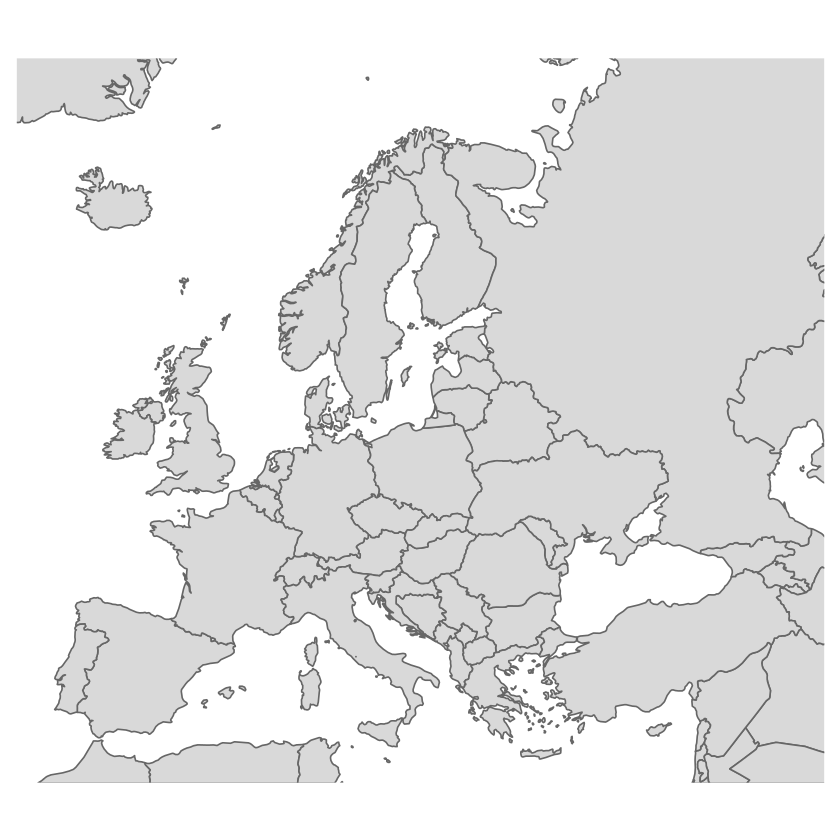

In [5]:
# Make a quick plot of the Europe object
base <- qtm(Europe, frame=F)
base

In [6]:
# Read in csv of cheese stats | Source: International Dairy Federation and Statistics Canada 
cheese_stats <- read.csv("~/Desktop/SpeakingEngagements/Dev_Picnic/cheese_stats.csv", sep=',', check.names=F)

In [7]:
# Eyeball cheese stats 
head(cheese_stats, n=5)

iso_a3 cheese_per_cap_2016
1 AUT    21.10              
2 BEL    15.00              
3 BGR    15.93              
4 BLR    12.90              
5 CHE    22.20

In [8]:
# Join cheese stats onto Europe spdf | left outer join
europe_cheese_stats <- append_data(shp=Europe, data=cheese_stats, key.shp="iso_a3", key.data="iso_a3", ignore.na=T)

Europe key variable "iso_a3" contains NA's, which are ignored
Under coverage: 39 out of 68 shape features did not get appended data. Run under_coverage() to get the corresponding feature id numbers and key values.


In [9]:
# Check join
head(europe_cheese_stats@data, n=5)

iso_a3 name    sovereignt continent part            EU_Schengen area      
5  ALB    Albania Albania    Europe    Southern Europe NA          27400.0000
6  ALA    Aland   Finland    Europe    Northern Europe NA            674.3813
7  AND    Andorra Andorra    Europe    Southern Europe NA            470.0000
10 ARM    Armenia Armenia    Asia      NA              NA                  NA
17 AUT    Austria Austria    Europe    Western Europe  EU Schengen 82409.0000
   pop_est pop_est_dens gdp_md_est gdp_cap_est economy                   
5  3639453 132.82675     21810      5992.659   6. Developing region      
6    27153  40.26357      1563     57562.700   2. Developed region: nonG7
7    83888 178.48511      3660     43629.601   2. Developed region: nonG7
10      NA        NA        NA            NA   NA                        
17 8210281  99.62845    329500     40132.609   2. Developed region: nonG7
   income_grp              life_exp well_being HPI      cheese_per_cap_2016
5  4. Lower middle income  76.9     5.268937   54.05118   NA               
6  1. High income: OECD      NA           NA         NA   NA               
7  2. High income: nonOECD   NA           NA         NA   NA               
10 NA                        NA           NA         NA   NA               
17 1. High income: OECD    80.9     7.346036   47.08514 21.1

In [10]:
# Identify the country rows which didn't have any cheese stats to join
no_cheese_countries <- under_coverage()
countries_to_cut <- no_cheese_countries$value
countries_to_cut; length(countries_to_cut)

[1] ALB  ALA  AND  ARM  AZE  BIH  DZA  FRO  GEO  GGY  GRC  GRL  IMN  IRN  IRQ 
[16] ISR  JEY  JOR  KAZ  <NA> LBN  LIE  MAR  MCO  MDA  MKD  MLT  MNE  PRT  PSE 
[31] ROU  SAU  SMR  SRB  SVN  SYR  TUN  TUR  VAT 
67 Levels: ALA ALB AND ARM AUT AZE BEL BGR BIH BLR CHE CYP CZE DEU DNK ... VAT

[1] 39

In [12]:
# Cut out these countries from the merged spdf
cheese_countries <- europe_cheese_stats[!(europe_cheese_stats@data$iso_a3 %in% countries_to_cut), ]

In [13]:
# Check size of new object
dim(cheese_countries)

[1] 29 17

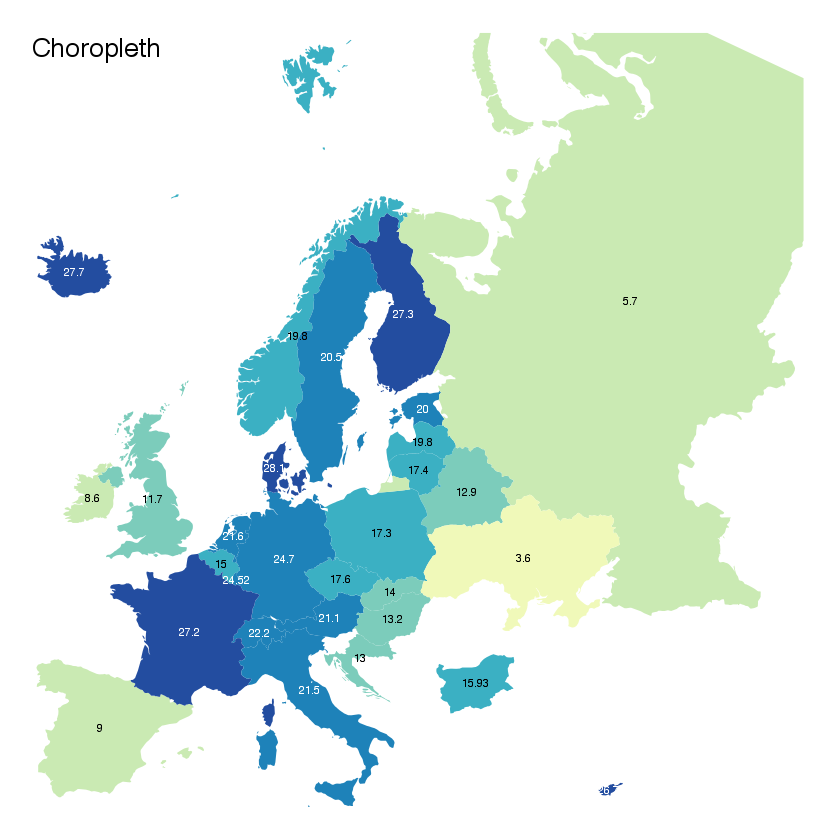

In [19]:
# Make Choropleth map
choropleth <- tm_shape(cheese_countries) + 
    tm_fill("cheese_per_cap_2016", palette="YlGnBu") + 
    tm_text("cheese_per_cap_2016", scale=0.5) +
    tm_layout(title="Choropleth", frame=F, legend.show=F)
choropleth

In [20]:
# Run Rubber-Sheet Distortion Algorithm to calculate resized spdf | continugous area cartogram
rubber_cheese <- cartogram(cheese_countries, "cheese_per_cap_2016")

Mean size error for iteration 1: 8.35641640934517
Mean size error for iteration 2: 5.29047676651798
Mean size error for iteration 3: 3.5587687304963
Mean size error for iteration 4: 2.50859494670738
Mean size error for iteration 5: 1.84895433545858
Mean size error for iteration 6: 1.50001940796679
Mean size error for iteration 7: 1.31456739129909
Mean size error for iteration 8: 1.21152173616779
Mean size error for iteration 9: 1.14975054270483
Mean size error for iteration 10: 1.11115786147988
Mean size error for iteration 11: 1.08604653188099
Mean size error for iteration 12: 1.068497708694
Mean size error for iteration 13: 1.05543889615414
Mean size error for iteration 14: 1.04546150930687
Mean size error for iteration 15: 1.03770619603007


#### # Optimisation Algorithm trying to translate from 3D to 2D + whilst also preserving original topology
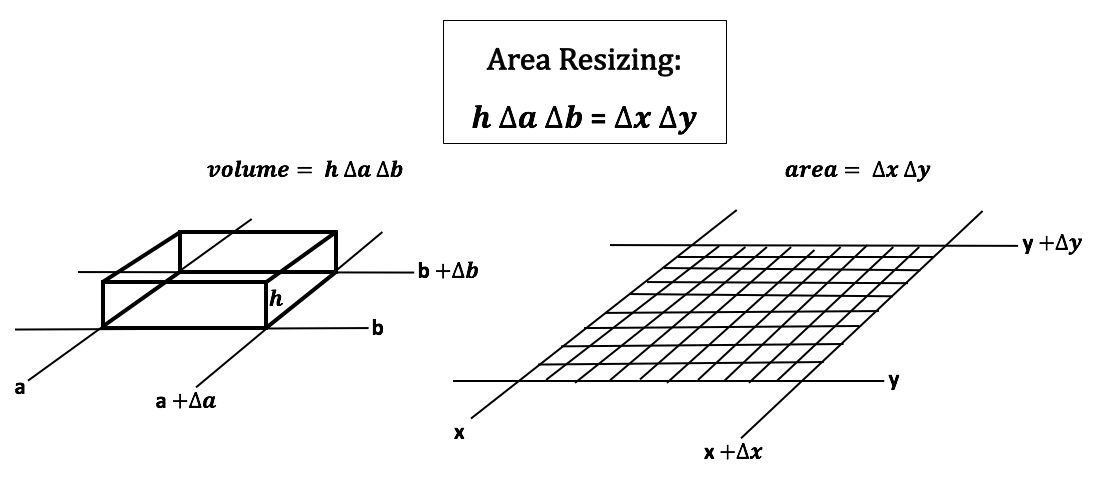

_Inspired by: Ingeborg Groeneweg, Universiteit Utrecht_

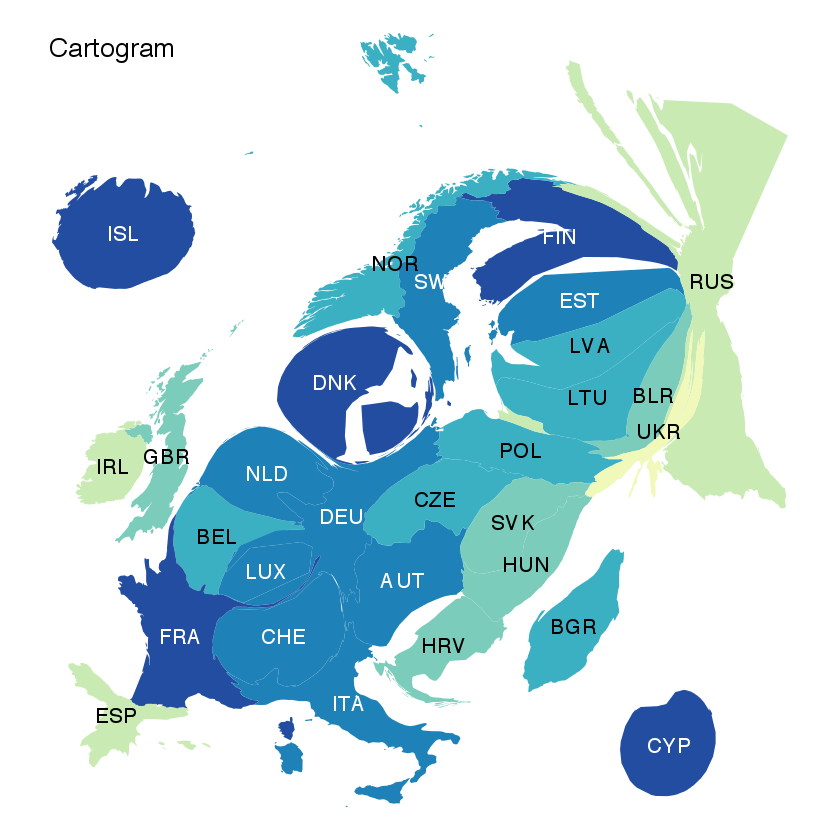

In [23]:
# Make Cartogram 
cartogram <- tm_shape(rubber_cheese) + 
    tm_fill("cheese_per_cap_2016", palette="YlGnBu") +
    tm_text("iso_a3") +
    tm_layout(title="Cartogram", frame=F, legend.show=F)
cartogram

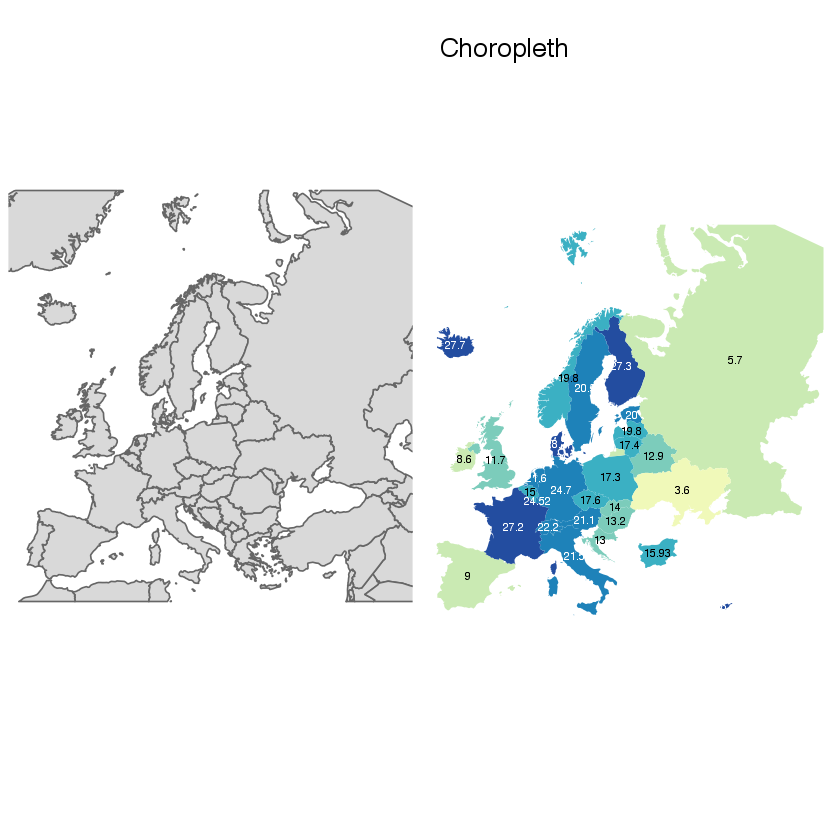

In [25]:
# Compare base map vs choropleth
tmap_arrange(base, choropleth, nrow=1)

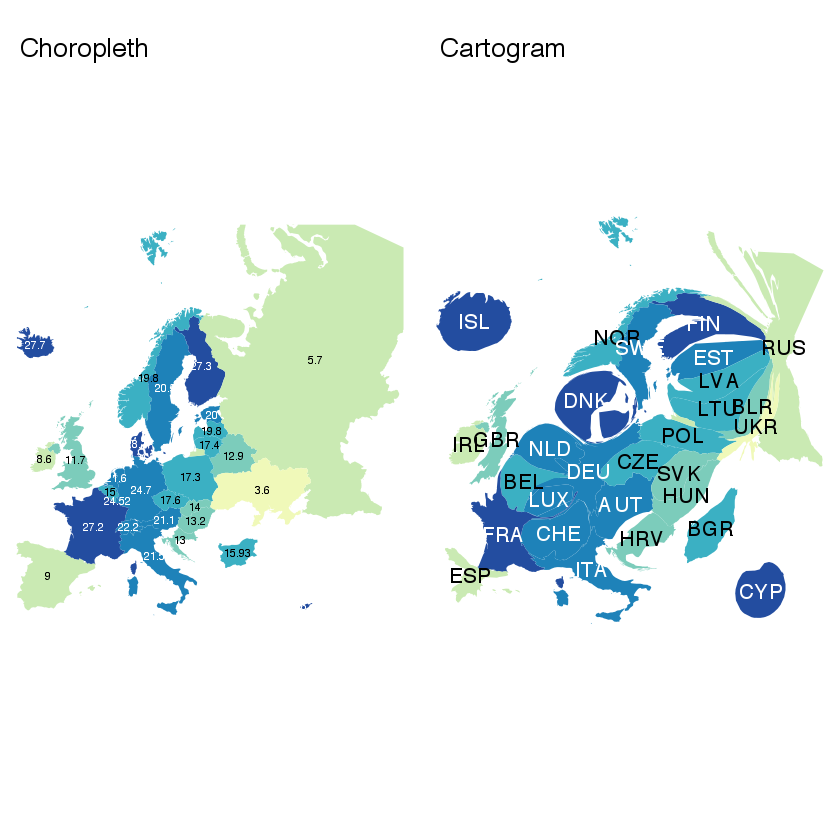

In [26]:
# Compare choropleth vs cartogram
tmap_arrange(choropleth, cartogram, nrow=1)